In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
evict_hist=pd.read_excel('DallasCounty_HistoricalEvictionRecords.xlsx')

In [3]:
def def_names(df):
    df['def_business'] = 0
        
    # Sort out defendent names containing a key word
    key_words = [' INC', ' LLC', 'SHOP', ' LLP', 'RESTAURANT', 'PARTNER', 'CORP']
    for key in key_words:
        df.loc[df['defendant_name'].str.contains(key), 'def_business'] = 1
    
    return(df)

def_names(evict_hist)

,case_number,court,filed_date,appearance_date,appearance_time,non_payment_of_rent,plaintiff_name,pl_address,pl_city,pl_state,...,monthly_rent,receiving_subsidy,NAME_2020,GEOID_2020,NAME_2010,GEOID_2010,lon,lat,zip,def_business
0,2202635A,Court 3-1,2022-05-06,2022-05-23,10:00:00,Y,9701 WEST FERRIS BRANCH BLVD LLC,9701 W FERRIS BRANCH BLVD,DALLAS,TX,...,1349.0,N,Census Tract 78.34,48113007834,Census Tract 78.11,48113007811,-96.725520,32.903540,75243,0
1,2202632A,Court 3-1,2022-05-06,2022-05-23,10:00:00,Y,9701 WEST FERRIS BRANCH BLVD LLC,9701 W FERRIS BRANCH BLVD,DALLAS,TX,...,1094.0,N,Census Tract 78.34,48113007834,Census Tract 78.11,48113007811,-96.725520,32.903540,75243,0
2,2202634A,Court 3-1,2022-05-06,2022-05-23,10:00:00,Y,9701 WEST FERRIS BRANCH BLVD LLC,9701 W FERRIS BRANCH BLVD,DALLAS,TX,...,1134.0,N,Census Tract 78.34,48113007834,Census Tract 78.11,48113007811,-96.725520,32.903540,75243,0
3,2202633A,Court 3-1,2022-05-06,2022-05-23,10:00:00,Y,9701 WEST FERRIS BRANCH BLVD LLC,9701 W FERRIS BRANCH BLVD,DALLAS,TX,...,1425.0,N,Census Tract 78.34,48113007834,Census Tract 78.11,48113007811,-96.725520,32.903540,75243,0
4,2251510P,Court 5-2,2022-05-06,2022-05-23,09:00:00,Y,CAMDEN BELMONT,2500 BENNETT AVE,DALLAS,TX,...,1791.0,NaN,Census Tract 9.01,48113000901,Census Tract 9,48113000900,-96.782627,32.813467,75206,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185229,2203269A,Court 3-1,2022-06-13,2022-07-08,10:00:00,Y,12639 COIT DALLAS LLC,12639 COIT RD,DALLAS,TX,...,2171.0,NaN,Census Tract 132.02,48113013202,Census Tract 132,48113013200,-96.769255,32.920465,75251,0
185230,2203327A,Court 3-1,2022-06-14,2022-07-11,10:00:00,Y,951 ABRAMS RD LLC DBA,951 ABRAMS RD,RICHARDSON,TX,...,1102.0,NaN,Census Tract 190.40,48113019040,Census Tract 190.40,48113019040,-96.732328,32.934061,75081,0
185231,2203268A,Court 3-1,2022-06-13,2022-07-08,10:00:00,Y,12639 COIT DALLAS LLC,12639 COIT RD,DALLAS,TX,...,1329.0,NaN,Census Tract 132.02,48113013202,Census Tract 132,48113013200,-96.769255,32.920465,75251,0
185232,2203391A,Court 3-1,2022-06-16,2022-07-12,10:00:00,Y,12639 COIT DALLAS LLC,12639 COIT,DALLAS,TX,...,1378.0,N,Census Tract 132.02,48113013202,Census Tract 132,48113013200,-96.769255,32.920465,75251,0


In [4]:
evict_hist_def_names = def_names(evict_hist)
evict_hist_no_bus = evict_hist_def_names[evict_hist_def_names['def_business'] == 0]
len(evict_hist_no_bus)

184780

In [5]:
# Extract yr-mo
evict_yr_mo = []
evict_mo = []
for i in evict_hist_no_bus['filed_date'].astype(str):
    if len(i.split('-')) > 2:
        evict_yr_mo.append(i.split('-')[0] + '-' + i.split('-')[1])
        evict_mo.append(i.split('-')[1])
    else:
        evict_yr_mo.append(i.split('-')[0])
        evict_mo.append('Na')

In [6]:
# Add yr-mo and mo to data frame
evict_hist_no_bus['yr_mo'] = evict_yr_mo

/tmp/ipykernel_1842770/3627411219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evict_hist_no_bus['yr_mo'] = evict_yr_mo


In [7]:
# Group by yr_mo
evict_hist_yr_mo_group = evict_hist_no_bus.groupby('yr_mo').nunique()
evict_hist_yr_mo_group = evict_hist_yr_mo_group.drop(index=['2011-11','NaT'])
evict_hist_yr_mo_group['yr_mo_col'] = evict_hist_yr_mo_group.index
evict_hist_yr_mo_group.head(3)


,case_number,court,filed_date,appearance_date,appearance_time,non_payment_of_rent,plaintiff_name,pl_address,pl_city,pl_state,...,receiving_subsidy,NAME_2020,GEOID_2020,NAME_2010,GEOID_2010,lon,lat,zip,def_business,yr_mo_col
yr_mo,,,,,,,,,,,,,,,,,,,,,
2017-01,3504,10,22,0,0,0,1444,1236,70,4,...,0,528,528,439,439,2175,2187,88,1,2017-01
2017-02,3030,10,20,0,0,0,1289,1105,60,2,...,0,501,501,421,421,1964,1975,86,1,2017-02
2017-03,2495,10,23,0,0,0,1191,1025,61,4,...,0,489,489,419,419,1686,1684,89,1,2017-03


In [8]:
evict_hist_yr_mo_group['yr_mo_col_num'] = evict_hist_yr_mo_group['yr_mo_col'].str.replace('-','').astype(float)

In [9]:
evict_hist_yr_mo_group['yr_mo_col_ord'] = range(len(evict_hist_yr_mo_group['yr_mo_col_num']))
evict_hist_yr_mo_group['yr_mo_col_ord']

yr_mo
2017-01     0
2017-02     1
2017-03     2
2017-04     3
2017-05     4
           ..
2022-02    61
2022-03    62
2022-04    63
2022-05    64
2022-06    65
Name: yr_mo_col_ord, Length: 66, dtype: int64

In [10]:
ev_mo = []
for i in evict_hist_yr_mo_group['yr_mo_col']:
    ev_mo.append(i.split('-')[1])
        
evict_hist_yr_mo_group['ev_mo'] = ev_mo

In [11]:
covid_status = []
for i in evict_hist_yr_mo_group['yr_mo_col_num']:
    if i < 202003:
        covid_status.append('Pre-Covid')
    else:
        covid_status.append('Covid and Post-Covid')
        
evict_hist_yr_mo_group['covid_status'] = covid_status

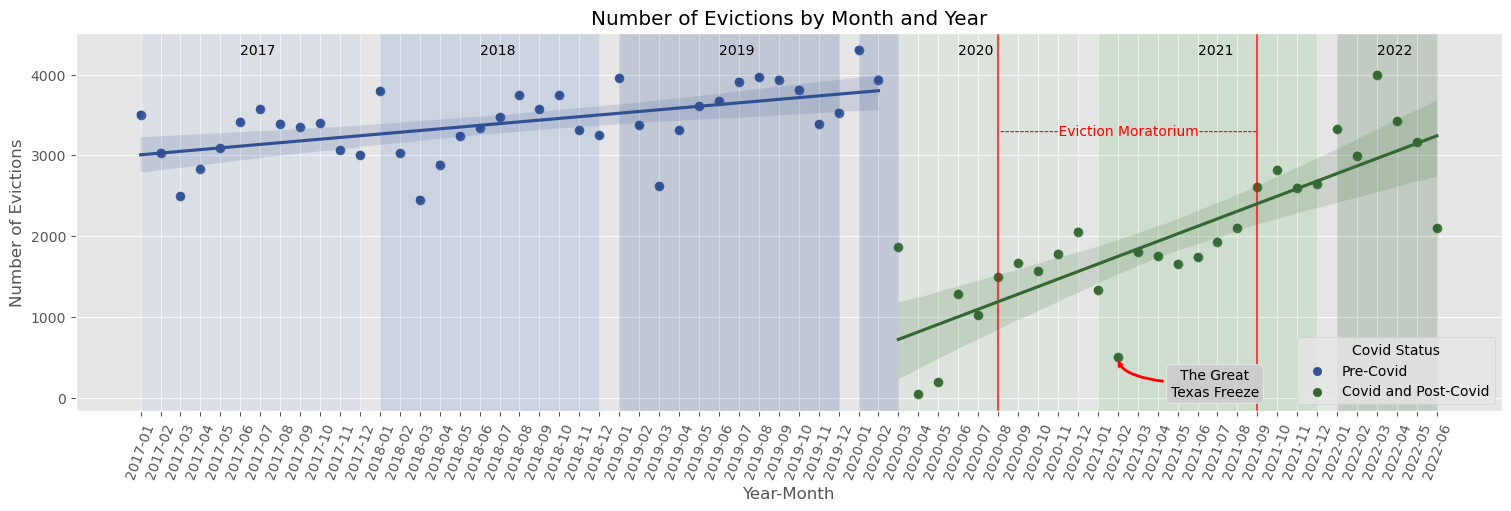

In [12]:
plt.style.use('ggplot')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5), layout='constrained')

# Add scatterplot + legend
pre_col = '#315094'
post_col = '#346732'
cov_colors = {'Pre-Covid': pre_col, 'Covid and Post-Covid': post_col}
scatter = sns.scatterplot(data=evict_hist_yr_mo_group, x='yr_mo_col', y='case_number', palette=cov_colors,
                          ax=ax, hue='covid_status', s=40).set(title='Number of Evictions by Month and Year', 
                                           ylabel='Number of Evictions', xlabel='Year-Month');

ax.legend(loc=4, ncol=1, title='Covid Status')#, labels=['Pre-Covid', 'Covid and Post-Covid'])

# Add annotation by year
yr_alpha = 0.2
text_y = 4250
ax.axvspan('2017-01', '2017-12', color='#B2C2E6', alpha=yr_alpha)
ax.annotate('2017', xy =('2017-06', text_y), ha='left')
ax.axvspan('2018-01', '2018-12', color='#6686CC', alpha=yr_alpha)
ax.annotate('2018', xy =('2018-06', text_y), ha='left')
ax.axvspan('2019-01', '2019-12', color='#315094', alpha=yr_alpha)
ax.annotate('2019', xy =('2019-06', text_y), ha='left')

ax.axvspan('2020-01', '2020-03', color='#315094', alpha=yr_alpha)
ax.axvspan('2020-03', '2020-12', color='#BBDEBA', alpha=yr_alpha)

ax.annotate('2020', xy =('2020-06', text_y), ha='left')
ax.axvspan('2021-01', '2021-12', color='#78BD75', alpha=yr_alpha)
ax.annotate('2021', xy =('2021-06', text_y), ha='left')
ax.axvspan('2022-01', '2022-06', color='#346732', alpha=yr_alpha)
ax.annotate('2022', xy =('2022-03', text_y), ha='left')


# Add moratorium to graph
mora_color = 'red'
ax.axvline('2020-08', color=mora_color, alpha=0.7)
ax.axvline('2021-09', color=mora_color, alpha=0.7)
ax.annotate('------------Eviction Moratorium------------', xy =('2021-09', text_y-1000), ha='right', color=mora_color)

# Add regression plots
pol_order=1
lin_plot = sns.regplot(x ='yr_mo_col_ord', y ='case_number', order=1, color=pre_col,
                       data = evict_hist_yr_mo_group[evict_hist_yr_mo_group['covid_status']=='Pre-Covid'], ax=ax);

lin_plot = sns.regplot(x ='yr_mo_col_ord', y ='case_number', order=1, color=post_col,
                       data = evict_hist_yr_mo_group[evict_hist_yr_mo_group['covid_status']=='Covid and Post-Covid'], ax=ax).set(title='Number of Evictions by Month and Year', 
                                           ylabel='Number of Evictions', xlabel='Year-Month');

# Label freeze
bbox = dict(boxstyle ="round", fc ="0.8")
#arrowprops = dict(
 #   arrowstyle = "->", color='black',
  #  connectionstyle = "angle, angleA = 0, angleB = 90,\
   # rad = 10")
arrowprops=dict(arrowstyle="simple",
                            color='red', ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90")
ax.annotate('The Great\nTexas Freeze', xy=('2021-02', 498), xytext=(70, -30), 
            textcoords='offset points', ha='center', va='bottom',
            bbox = bbox, arrowprops = arrowprops)

# Adjust x-axis labels
ax.set_xticks(range(len(evict_hist_yr_mo_group)));
ax.set_xticklabels(evict_hist_yr_mo_group['yr_mo_col']);
plt.xticks(rotation=70);



In [13]:
# Extract pre and post covid
pre_evict_hist_yr_mo_group = evict_hist_yr_mo_group[evict_hist_yr_mo_group['covid_status']=='Pre-Covid']
post_evict_hist_yr_mo_group = evict_hist_yr_mo_group[evict_hist_yr_mo_group['covid_status']=='Covid and Post-Covid']

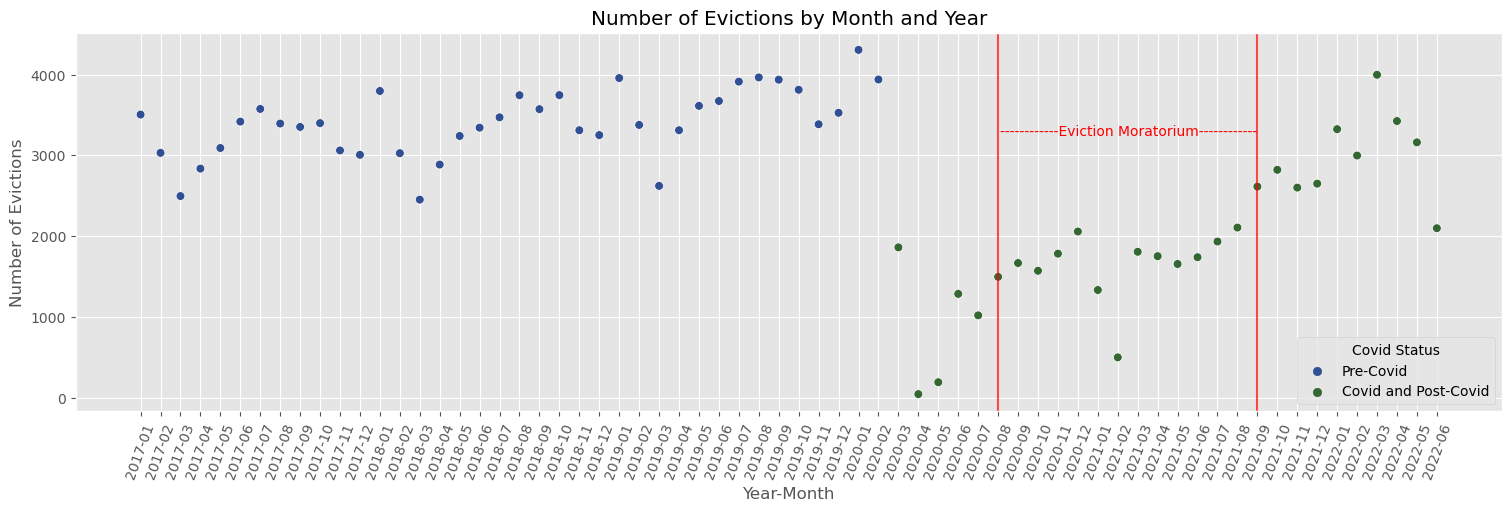

In [14]:
#Zooming in on Moratorium

plt.style.use('ggplot')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5), layout='constrained')

# Add scatterplot + legend
pre_col = '#315094'
post_col = '#346732'
cov_colors = {'Pre-Covid': pre_col, 'Covid and Post-Covid': post_col}
scatter = sns.scatterplot(data=evict_hist_yr_mo_group, x='yr_mo_col', y='case_number', palette=cov_colors,
                          ax=ax, hue='covid_status', s=40).set(title='Number of Evictions by Month and Year', 
                                           ylabel='Number of Evictions', xlabel='Year-Month');

ax.legend(loc=4, ncol=1, title='Covid Status')#, labels=['Pre-Covid', 'Covid and Post-Covid'])

# Add annotation by year
yr_alpha = 0.2
text_y = 4250

# Add moratorium to graph
mora_color = 'red'
ax.axvline('2020-08', color=mora_color, alpha=0.7)
ax.axvline('2021-09', color=mora_color, alpha=0.7)
ax.annotate('------------Eviction Moratorium------------', xy =('2021-09', text_y-1000), ha='right', color=mora_color)

# Add regression plots
#pol_order=1
#lin_plot = sns.regplot(x ='yr_mo_col_ord', y ='case_number', order=1, color=pre_col,
 #                      data = evict_hist_yr_mo_group[evict_hist_yr_mo_group['covid_status']=='Pre-Covid'], ax=ax);

#lin_plot = sns.regplot(x ='yr_mo_col_ord', y ='case_number', order=1, color=post_col,
#                       data = evict_hist_yr_mo_group[evict_hist_yr_mo_group['covid_status']=='Covid and Post-Covid'], ax=ax).set(title='Number of Evictions by Month and Year', 
#                                           ylabel='Number of Evictions', xlabel='Year-Month');




# Adjust x-axis labels
ax.set_xticks(range(len(evict_hist_yr_mo_group)));
ax.set_xticklabels(evict_hist_yr_mo_group['yr_mo_col']);
plt.xticks(rotation=70);



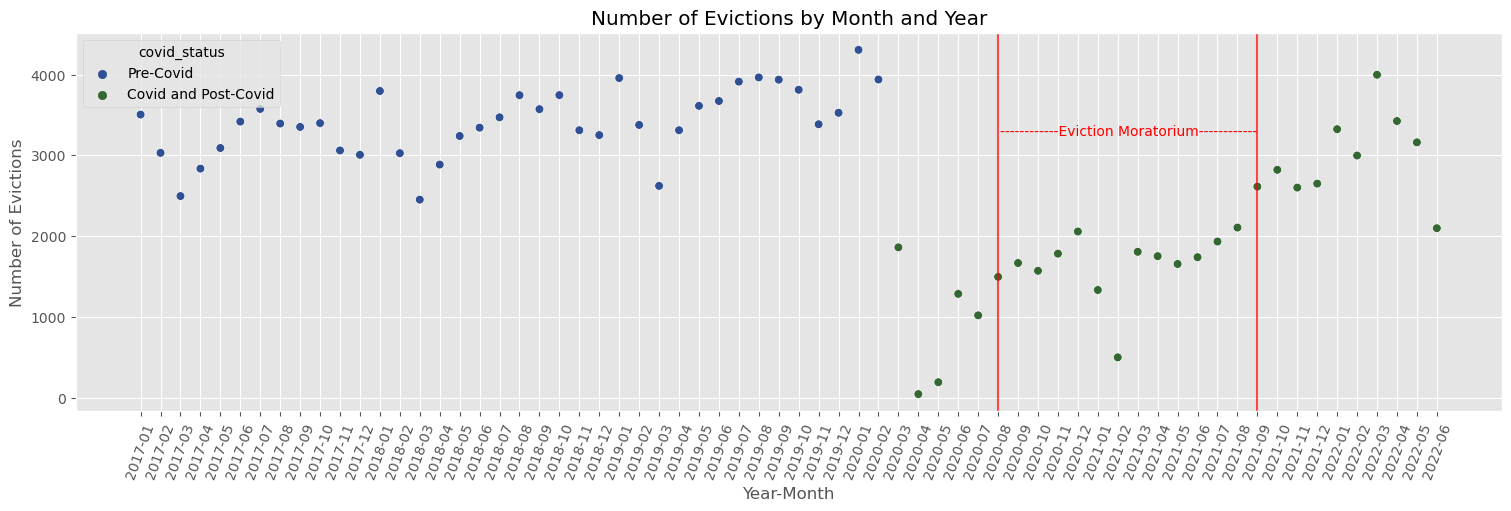

In [15]:
#zooming in 
#Zooming in on Moratorium

plt.style.use('ggplot')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5), layout='constrained')

# Add scatterplot + legend
pre_col = '#315094'
post_col = '#346732'
cov_colors = {'Pre-Covid': pre_col, 'Covid and Post-Covid': post_col}
scatter = sns.scatterplot(data=evict_hist_yr_mo_group, x='yr_mo_col', y='case_number', palette=cov_colors,
                          ax=ax, hue='covid_status', s=40).set(title='Number of Evictions by Month and Year', 
                                           ylabel='Number of Evictions', xlabel='Year-Month');

#ax.legend(loc=4, ncol=1, title='Covid Status')#, labels=['Pre-Covid', 'Covid and Post-Covid'])

# Add annotation by year
yr_alpha = 0.2
text_y = 4250

# Add moratorium to graph
mora_color = 'red'
ax.axvline('2020-08', color=mora_color, alpha=0.7)
ax.axvline('2021-09', color=mora_color, alpha=0.7)
ax.annotate('------------Eviction Moratorium------------', xy =('2021-09', text_y-1000), ha='right', color=mora_color)


# Adjust x-axis labels
ax.set_xticks(range(len(evict_hist_yr_mo_group)));
ax.set_xticklabels(evict_hist_yr_mo_group['yr_mo_col']);
plt.xticks(rotation=70);



In [16]:
evict_hist_yr_mo_group.columns

Index(['case_number', 'court', 'filed_date', 'appearance_date',
       'appearance_time', 'non_payment_of_rent', 'plaintiff_name',
       'pl_address', 'pl_city', 'pl_state', 'pl_zip', 'pl_phone',
       'defendant_name', 'df_address', 'df_city', 'df_state', 'df_zip',
       'df_phone', 'judgment_date', 'amount_filed', 'monthly_rent',
       'receiving_subsidy', 'NAME_2020', 'GEOID_2020', 'NAME_2010',
       'GEOID_2010', 'lon', 'lat', 'zip', 'def_business', 'yr_mo_col',
       'yr_mo_col_num', 'yr_mo_col_ord', 'ev_mo', 'covid_status'],
      dtype='object')

In [17]:
evict_hist_yr_mo_group.head(4)

,case_number,court,filed_date,appearance_date,appearance_time,non_payment_of_rent,plaintiff_name,pl_address,pl_city,pl_state,...,GEOID_2010,lon,lat,zip,def_business,yr_mo_col,yr_mo_col_num,yr_mo_col_ord,ev_mo,covid_status
yr_mo,,,,,,,,,,,,,,,,,,,,,
2017-01,3504,10,22,0,0,0,1444,1236,70,4,...,439,2175,2187,88,1,2017-01,201701.0,0,01,Pre-Covid
2017-02,3030,10,20,0,0,0,1289,1105,60,2,...,421,1964,1975,86,1,2017-02,201702.0,1,02,Pre-Covid
2017-03,2495,10,23,0,0,0,1191,1025,61,4,...,419,1686,1684,89,1,2017-03,201703.0,2,03,Pre-Covid
2017-04,2835,10,20,0,0,0,1192,1018,60,3,...,425,1823,1827,84,1,2017-04,201704.0,3,04,Pre-Covid


In [18]:
moratorium_time=evict_hist_yr_mo_group[evict_hist_yr_mo_group['yr_mo_col_num'].between(202008, 202108)]
moratorium_time.head()

,case_number,court,filed_date,appearance_date,appearance_time,non_payment_of_rent,plaintiff_name,pl_address,pl_city,pl_state,...,GEOID_2010,lon,lat,zip,def_business,yr_mo_col,yr_mo_col_num,yr_mo_col_ord,ev_mo,covid_status
yr_mo,,,,,,,,,,,,,,,,,,,,,
2020-08,1495,10,21,0,0,0,709,618,50,2,...,340,974,970,83,1,2020-08,202008.0,43,08,Covid and Post-Covid
2020-09,1666,10,21,0,0,0,712,593,42,2,...,347,1072,1033,83,1,2020-09,202009.0,44,09,Covid and Post-Covid
2020-10,1570,10,22,0,0,0,714,594,49,3,...,345,1025,1016,84,1,2020-10,202010.0,45,10,Covid and Post-Covid
2020-11,1782,10,19,0,0,0,771,572,45,2,...,343,1099,1095,83,1,2020-11,202011.0,46,11,Covid and Post-Covid
2020-12,2056,10,23,0,0,0,897,680,49,2,...,357,1303,1292,93,1,2020-12,202012.0,47,12,Covid and Post-Covid


In [19]:
moratorium_time=evict_hist_yr_mo_group[evict_hist_yr_mo_group['yr_mo_col_num'].between(202008, 202108)]
moratorium_time.head()

,case_number,court,filed_date,appearance_date,appearance_time,non_payment_of_rent,plaintiff_name,pl_address,pl_city,pl_state,...,GEOID_2010,lon,lat,zip,def_business,yr_mo_col,yr_mo_col_num,yr_mo_col_ord,ev_mo,covid_status
yr_mo,,,,,,,,,,,,,,,,,,,,,
2020-08,1495,10,21,0,0,0,709,618,50,2,...,340,974,970,83,1,2020-08,202008.0,43,08,Covid and Post-Covid
2020-09,1666,10,21,0,0,0,712,593,42,2,...,347,1072,1033,83,1,2020-09,202009.0,44,09,Covid and Post-Covid
2020-10,1570,10,22,0,0,0,714,594,49,3,...,345,1025,1016,84,1,2020-10,202010.0,45,10,Covid and Post-Covid
2020-11,1782,10,19,0,0,0,771,572,45,2,...,343,1099,1095,83,1,2020-11,202011.0,46,11,Covid and Post-Covid
2020-12,2056,10,23,0,0,0,897,680,49,2,...,357,1303,1292,93,1,2020-12,202012.0,47,12,Covid and Post-Covid


ValueError: The number of FixedLocator locations (13), usually from a call to set_ticks, does not match the number of labels (35).

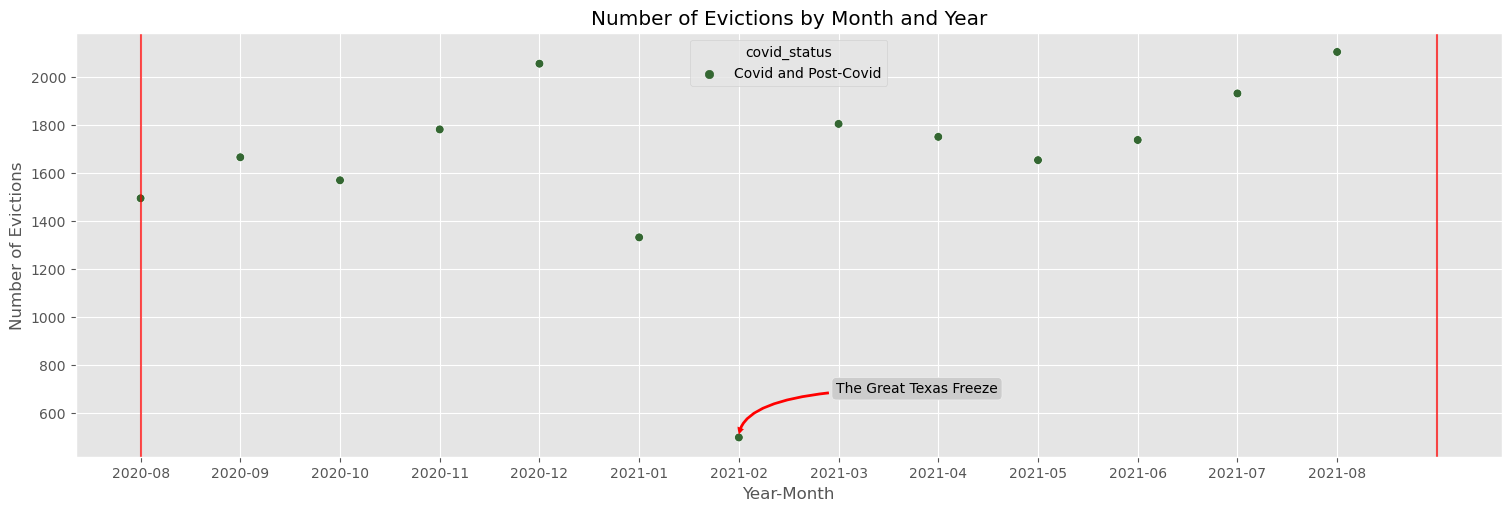

In [20]:
#zoom

plt.style.use('ggplot')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5), layout='constrained')

# Add scatterplot + legend
pre_col = '#315094'
post_col = '#346732'
cov_colors = {'Pre-Covid': pre_col, 'Covid and Post-Covid': post_col}
scatter = sns.scatterplot(data= moratorium_time, x='yr_mo_col' , y='case_number', palette=cov_colors,
                          ax=ax,hue='covid_status', s=40).set(title='Number of Evictions by Month and Year', 
                                           ylabel='Number of Evictions', xlabel='Year-Month');

#ax.legend(loc=4, ncol=1, title='Covid Status')#, labels=['Pre-Covid', 'Covid and Post-Covid'])

# Add annotation by year
yr_alpha = 0.2
text_y = 4250

# Add moratorium to graph
mora_color = 'red'
ax.axvline('2020-08', color=mora_color, alpha=0.7)
ax.axvline('2021-09', color=mora_color, alpha=0.7)
#ax.annotate('------------Eviction Moratorium------------', xy =('2021-09', text_y-1000), ha='right', color=mora_color)

# Label freeze
bbox = dict(boxstyle ="round", fc ="0.8")
#arrowprops = dict(
 #   arrowstyle = "->", color='black',
  #  connectionstyle = "angle, angleA = 0, angleB = 90,\
   # rad = 10")
arrowprops=dict(arrowstyle="simple",
                            color='red', ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90")
ax.annotate('The Great Texas Freeze', xy=('2021-02', 498), xytext=(70, 30), 
            textcoords='offset points', ha='left', va='bottom',
            bbox = bbox, arrowprops = arrowprops)



# Adjust x-axis labels
ax.set_xticks(range(len(moratorium_time)));
ax.set_xticklabels(moratorium_time);
plt.xticks(rotation=70);



In [ ]:
jud

In [25]:
# Extract yr-mo
jud_yr_mo = []
jud_mo = []
for i in jud['file_date'].astype(str):
    if len(i.split('/')) > 2:
        if(len(i.split('/')[0].split('0')) > 1):
            jud_yr_mo.append(i.split('/')[2] + '/' + i.split('/')[0])
            jud_mo.append(i.split('/')[0])
        else:
            jud_yr_mo.append(i.split('/')[2] + '/0' + i.split('/')[0])
            jud_mo.append(i.split('/')[0])
    else:
        jud_yr_mo.append(i.split('/')[2])
        jud_mo.append('Na')

jud['yr_mo'] = jud_yr_mo

In [23]:
#find the percentage of nonzero judgments within each yr mo; 
#out of all cases how many of them have a nonzero judgment
jud= pd.read_csv('jud_geo_no_bus_ad_filter.csv')


nonzeros= jud[jud['judgment_amt']!=0.00]
#nonzeros.count() #  7270

zeros= len(jud)-len(nonzeros) #1467

#len(jud) #8737
#jud['yr_mo'] = jud_yr_mo
jud.head()
#Out of all the cases 83% have nonzero judgments
#7270/8737 #0.8320933959024837

,Unnamed: 0.1,Unnamed: 0,case_number,file_date,judgment_date.x,judgment_signed,judgment_amt,total_paid,court,filed_date,...,NAME_2020,GEOID_2020,NAME_2010,GEOID_2010,lon,lat,zip,def_business,pl_address_f2,pl_address_f3
0,0,1,2100568E,8/11/2021,3/14/2022,3/14/2022,4378.00,141,Court 2-2,8/11/2021,...,Census Tract 126.04,48113012604,Census Tract 126.04,48113012604,-96.646951,32.853140,75228,0,11760 FERGUSON,11760 FERGUSON RD
1,1,2,2100785E,10/13/2021,3/18/2022,3/18/2022,0.00,141,Court 2-2,10/13/2021,...,Census Tract 180.02,48113018002,Census Tract 180.02,48113018002,-96.640709,32.820437,75150,0,2901 LIVE,2901 LIVE OAK
2,2,3,2100804K,10/8/2021,4/14/2022,4/14/2022,0.00,141,Court 1-2,10/8/2021,...,Census Tract 168.05,48113016805,Census Tract 168.04,48113016804,-96.817121,32.598899,75146,0,485 ROLLING,485 ROLLING HILLS
3,3,4,2100818E,10/22/2021,5/16/2022,NaN,5637.26,221,Court 2-2,10/22/2021,...,Census Tract 173.11,48113017311,Census Tract 173.03,48113017303,-96.574327,32.761831,75149,0,5550 GRANITE,5550 GRANITE PKWY
4,4,5,2100825E,10/28/2021,3/14/2022,3/14/2022,4789.09,141,Court 2-2,10/28/2021,...,Census Tract 178.18,48113017818,Census Tract 178.13,48113017813,-96.621073,32.799596,75150,0,2605 FRANKLIN,2605 FRANKLIN DR


In [26]:
jud['yr_mo'] = jud_yr_mo

In [27]:
jud[jud['judgment_amt']!=0.00].groupby('yr_mo')['judgment_amt'].sum()

yr_mo
0000/00        1525.35
2000/03        3630.59
2021/011      86454.85
2021/012     186184.80
2021/03        7800.00
2021/08        4378.00
2021/10       32862.15
2022/01      627126.24
2022/012       4078.91
2022/02     3330438.39
2022/03     8174730.95
2022/04     6188355.53
2022/05     4965607.29
2022/06      565965.03
2023/03        4156.70
Name: judgment_amt, dtype: float64

In [28]:
#just use a group by
non= jud[jud['judgment_amt']!=0.00].groupby('yr_mo')['judgment_amt'].count()
by_yr_mo=jud.groupby(['yr_mo'])['judgment_amt'].count()
pct_nonzero=pd.DataFrame((non/by_yr_mo) * 100)
pct_nonzero['yr_mo_col'] = pct_nonzero.index
pct_nonzero

,judgment_amt,yr_mo_col
yr_mo,,
0000/00,100.000000,0000/00
2000/03,100.000000,2000/03
2021/011,65.853659,2021/011
2021/012,75.409836,2021/012
2021/02,NaN,2021/02
2021/03,100.000000,2021/03
2021/08,100.000000,2021/08
2021/10,37.500000,2021/10
2022/01,88.770053,2022/01


In [34]:
pct_nonzeronew= pct_nonzero.drop(['0000/00','2000/03'])

In [37]:
pct_nonzeronew = pct_nonzeronew.sort_values('yr_mo_col')
pct_nonzeronew

,judgment_amt,yr_mo_col,yr_mo_col_num
yr_mo,,,
2021/011,65.853659,2021/011,2021011.0
2021/012,75.409836,2021/012,2021012.0
2021/02,NaN,2021/02,202102.0
2021/03,100.000000,2021/03,202103.0
2021/08,100.000000,2021/08,202108.0
2021/10,37.500000,2021/10,202110.0
2022/01,88.770053,2022/01,202201.0
2022/012,100.000000,2022/012,2022012.0
2022/02,86.118252,2022/02,202202.0


In [35]:
pct_nonzeronew['yr_mo_col_num'] = pct_nonzeronew['yr_mo_col'].str.replace("/","").astype(float)
pct_nonzeronew

,judgment_amt,yr_mo_col,yr_mo_col_num
yr_mo,,,
2021/011,65.853659,2021/011,2021011.0
2021/012,75.409836,2021/012,2021012.0
2021/02,NaN,2021/02,202102.0
2021/03,100.000000,2021/03,202103.0
2021/08,100.000000,2021/08,202108.0
2021/10,37.500000,2021/10,202110.0
2022/01,88.770053,2022/01,202201.0
2022/012,100.000000,2022/012,2022012.0
2022/02,86.118252,2022/02,202202.0


In [ ]:
yearmonths= jud['yr_mo']